In [1]:
#import necessary packages

In [23]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame

In [3]:
#load the data 
data=pd.read_csv("iris.csv")
data.head()#setosa,versicolor,virginca

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.shape

(150, 5)

In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [11]:
Counter(data.target)

Counter({0: 50, 1: 50, 2: 50})

In [12]:
X =data.iloc[:,:-1]
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [16]:
model=KMeans(n_clusters=3,random_state=3)
model.fit(X)
model.labels_#gives us the output of the trained model 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [18]:
accuracy_score(data.target,model.labels_)

0.8933333333333333

In [19]:
pd.crosstab(data.target,model.labels_)

col_0,0,1,2
target,,,
0,50,0,0
1,0,48,2
2,0,14,36


In [38]:
color=np.array(['red','blue','green'])

In [27]:
#visualization
y= pd.DataFrame(data.target)
y.head(2)

,target
0,0
1,0


Text(0.5, 1.0, 'this is actual data set ')

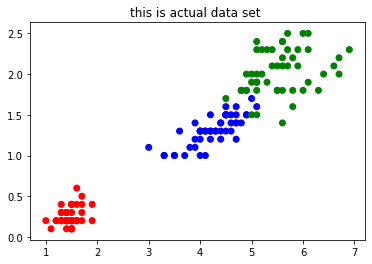

In [43]:
plt.scatter(x=data.petal_length,y=data.petal_width,c=color[data.target])
plt.title("this is actual data set ")

Text(0.5, 1.0, 'prediction')

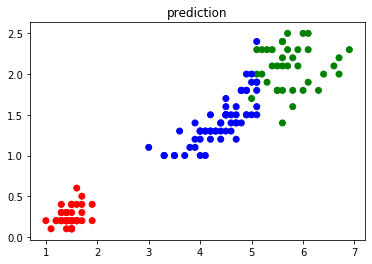

In [44]:
plt.scatter(x=data.petal_length, y=data.petal_width,c=color[model.labels_])
plt.title("prediction")

In [ ]:
#elbow technique 
#to find the no .of clusters hidden in the data or to find KMeans
#K=1to 17,we calculate distortion and then we plot graph K and the distortion
# distortion -avg distance of thr points to the centriod 
#d decreases as the number of the clustrs increases .

In [45]:
from scipy.spatial.distance import cdist

In [46]:
X=data.iloc[:,[2,3]]

In [51]:
#k means to determine   k
distortions =[]
K= range(1,17)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

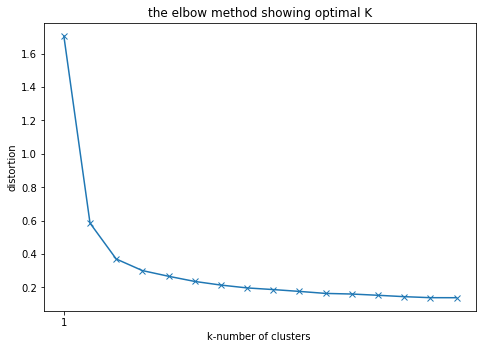

In [53]:
#plot the elbow
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,2))
ax.set_xlabel('k-number of clusters ')
ax.set_ylabel('distortion')
ax.set_title("the elbow method showing optimal K")
ax.plot(K,distortions,marker='x')
plt.show()

In [54]:
distortions#average distance from centeriods

[1.7069324035460887,
 0.5843925063315167,
 0.3692571031973975,
 0.2997148916349945,
 0.2655741264274258,
 0.23465255268567797,
 0.2127747188031227,
 0.19577258944446915,
 0.18581724830088003,
 0.17483449907865226,
 0.1628042169853195,
 0.1591141774334394,
 0.15160245838348405,
 0.1433492022531659,
 0.13726069952688116,
 0.13705602909616652]